In [3]:
# Importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the random 
import random
from pprint import pprint

In [4]:
#Importing the data using CSV file

import numpy as np
import pandas as pd
data = pd.read_csv('E:\Master of Science\Semester 1\ML\Assignment\Practical Assignment\diabetes.csv')
data = data.drop("Outcome", axis=1)
data = data.rename(columns={"Age": "label"})
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,label
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
# Getting the info of non null values and data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
label                       768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
#Spliting into training and testing data

In [6]:
def train_test_split(data, test_size):
    if isinstance(test_size,float):
        test_size = round(test_size * len(data))
    Row_number = data.index.tolist()   #Giving the number of indices
    test_row_number = random.sample(population= Row_number, k =test_size)  # Imported the random function for picking indices randomly

    test_data = data.loc[test_row_number]    #loc database allows to access certain rows
    train_data = data.drop(test_row_number)    # Dropping the test data from dataset and rest data frames are for traing 
    
    return train_data, test_data
    

In [8]:
random.seed(0) # Row numbers should be same every time after executing the code every time
train_data, test_data = train_test_split(data, test_size = 20)  #splitting the data into test and training
 

In [9]:
test_data.head()    # Getting first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,label
394,4,158,78,0,0,32.9,0.803,31
430,2,99,0,0,0,22.2,0.108,23
41,7,133,84,0,0,40.2,0.696,37
265,5,96,74,18,67,33.6,0.997,43
523,9,130,70,0,0,34.2,0.652,45


In [ ]:
# Creating functions for supporting(helping) the decision tree algorithm

In [12]:
data1 = train_data.values
data1[:5] 

array([[  6.00000000e+00,   1.48000000e+02,   7.20000000e+01,
          3.50000000e+01,   0.00000000e+00,   3.36000000e+01,
          6.27000000e-01,   5.00000000e+01],
       [  1.00000000e+00,   8.50000000e+01,   6.60000000e+01,
          2.90000000e+01,   0.00000000e+00,   2.66000000e+01,
          3.51000000e-01,   3.10000000e+01],
       [  8.00000000e+00,   1.83000000e+02,   6.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   2.33000000e+01,
          6.72000000e-01,   3.20000000e+01],
       [  1.00000000e+00,   8.90000000e+01,   6.60000000e+01,
          2.30000000e+01,   9.40000000e+01,   2.81000000e+01,
          1.67000000e-01,   2.10000000e+01],
       [  0.00000000e+00,   1.37000000e+02,   4.00000000e+01,
          3.50000000e+01,   1.68000000e+02,   4.31000000e+01,
          2.28800000e+00,   3.30000000e+01]])

In [99]:
# Puring the data (classes that contains same class of data(Pure data) and classes contains different kind of data(Impure data))

In [15]:
def check_purity(data1):
    label_column= data1[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False          # It will return true,if data is pure and false if data is not pure
       


In [144]:
# check_purity(train_data.values)   # It will give us 'false' because of different kind of data(classes) in label column.

False

In [20]:
# Classification of data

def classify_data(data1):
    label_column= data1[:, -1]
    classes_unique,counts_classes_unique = np.unique(label_column,return_counts = True)
    index = counts_classes_unique.argmax()   #To get the name of class that appears most often
    classification = classes_unique[index] 
    
    return classification

In [24]:
# Potential Splits
def get_potential_splits(data1):
    potential_splits = {}    # get the particual column/raw that splits the data 
    _, n_columns = data1.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = []
        values = data1[:,column_index]      # colan is just used to get the data from all the rows
        unique_values = np.unique(values)
#     if column_index ==3:
#         print(unique_values)
        for index in range(len(unique_values)):
        
           if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]    # we had done the minus 1 because first value doesn't have any previous value
                potential_split = (current_value + previous_value) / 2
                potential_splits[column_index].append(potential_split)
    
    
    return potential_splits

In [30]:
potential_splits = get_potential_splits(train_data.values)

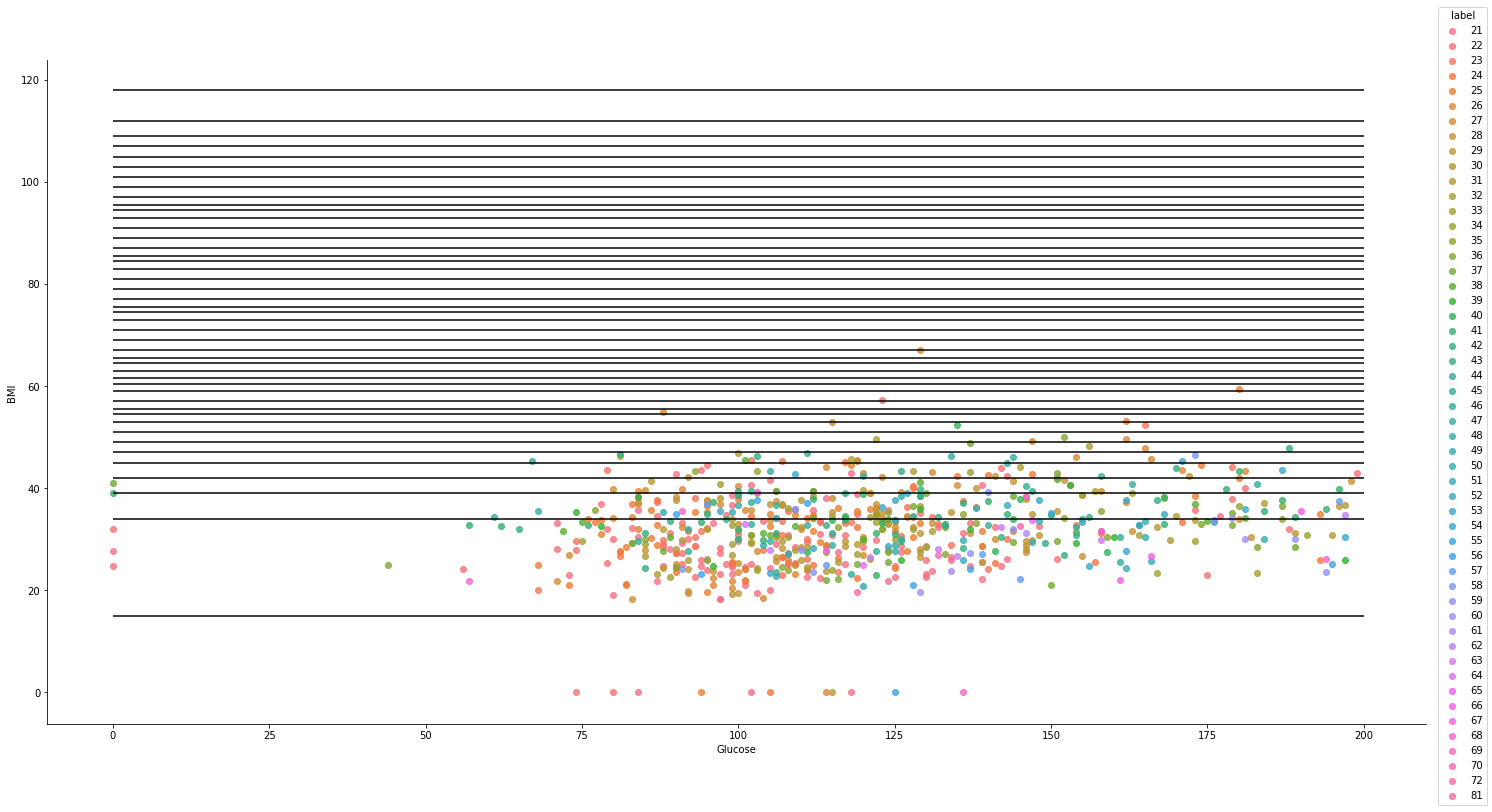

In [75]:
# Creating the scatter plot to check whether scatter plot is making any sense or not
sns.lmplot(data = train_data, x = "Glucose", y ="BMI",hue="label", fit_reg = False,
          size = 10, aspect = 2)   # sns has lmplot plotting library
# Hue argument is used to get the particual argument


# plotting the potetial split that will represented by vartical lines
# plt.vlines(x=potential_splits[3],ymin = 1, ymax = 70)

# plotting the potetial split that will represented by horizontal lines
plt.hlines(y=potential_splits[2],xmin= 0 , xmax = 200)

# Spliting  data

In [37]:
def split_data(data1, split_column, split_value):     # splitting the data as per different classes
    split_column_values = data1[:, split_column]

    data_below = data1[split_column_values <= split_value]
    data_above = data1[split_column_values > split_value]
    
    
    return data_below,data_above

In [38]:
split_column = 3
split_value = 0.8

In [40]:
data_below ,data_above = split_data(data1,split_column,split_value)

# Lowest overall Entropy function

In [41]:
#Entopy basically used to measure the impurity and can say first step to solve the dicision tree.
# It also defines the randomness in the data.
# It looks at potential splits and then find out the lowest entropy.

def calculate_entropy(data1):
    
    label_column = data1[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [42]:
# Attribut with highest information gain is considered the best.
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [45]:
# It is used to find the best split point out of potential splits 
def determine_best_split(data1, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data1, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

# Decision tree algorithm

# Algorithm

In [70]:
def decision_tree_algorithm(data, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = data.columns
        data = data.values
    else:
        data = data           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [71]:
tree = decision_tree_algorithm(train_data, max_depth=3)
pprint(tree)

{'Pregnancies <= 4.5': [{'BloodPressure <= 71.0': [22.0,
                                                   {'Pregnancies <= 2.5': [21.0,
                                                                           27.0]}]},
                        {'Pregnancies <= 6.5': [{'BMI <= 29.55': [30.0, 28.0]},
                                                {'Glucose <= 124.5': [42.0,
                                                                      41.0]}]}]}


# Classification of data

In [137]:
example = test_data.iloc[0]
example

Pregnancies                     4
Glucose                       158
BloodPressure                  78
SkinThickness                   0
Insulin                         0
BMI                          32.9
DiabetesPedigreeFunction    0.803
label                          31
classification                 27
classification_correct      False
Name: 394, dtype: object

In [192]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
            acuracy = 0.89
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [142]:
classify_example(example, tree)

27.0